In [141]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [142]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
fetch_housing_data()


In [143]:
data = pd.read_csv('./datasets/housing/housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [144]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [145]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

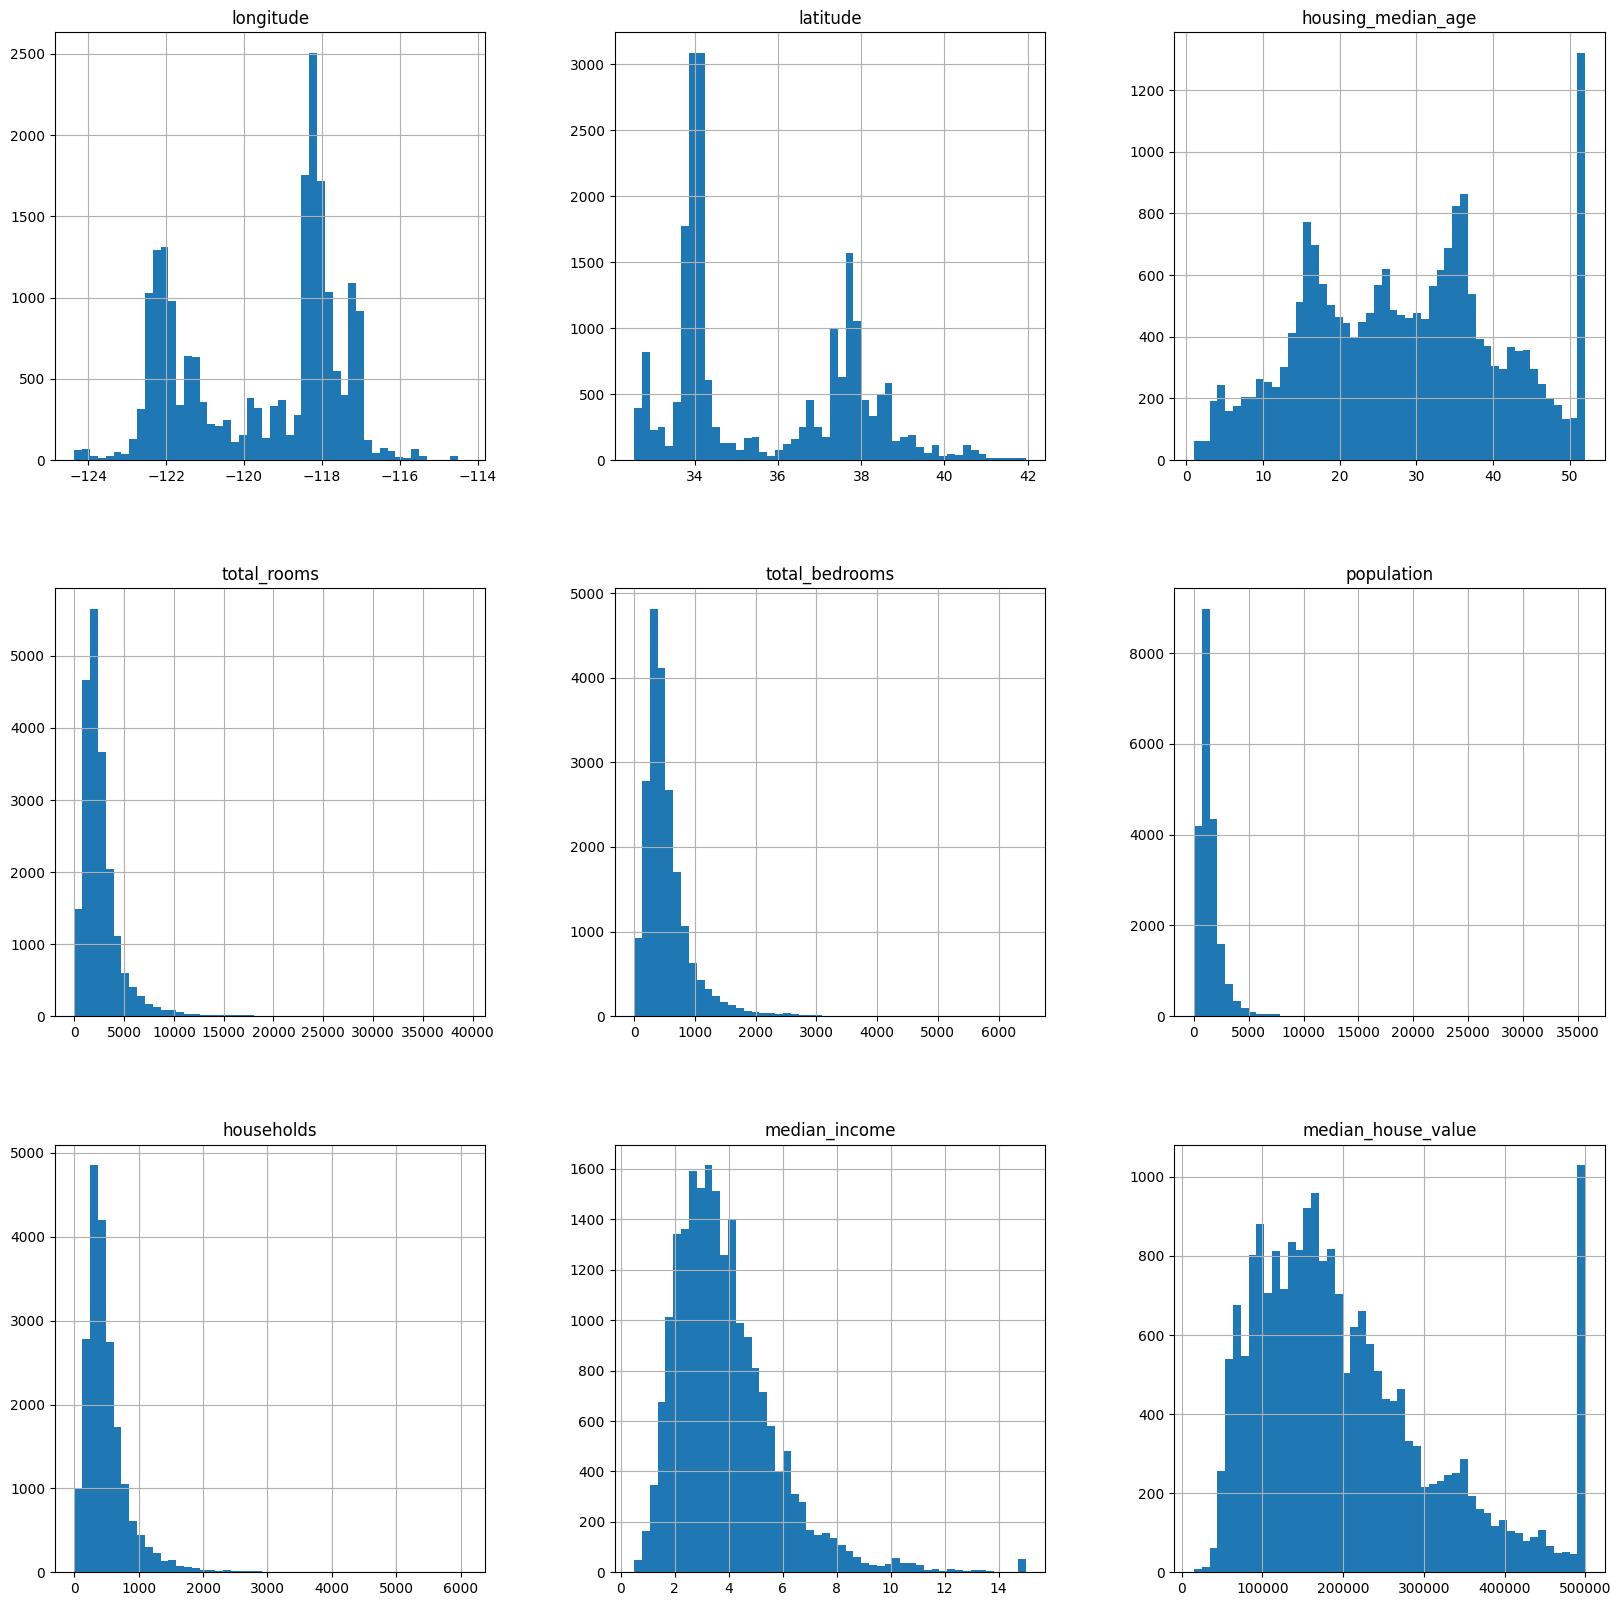

In [146]:
data.hist(bins=50,figsize=(20,20))

* heavy tail
* preprocessed age and income

## Create a Test Set

In [147]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [148]:
from sklearn.model_selection import StratifiedShuffleSplit

data["income_cat"] = pd.cut(data["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

## Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

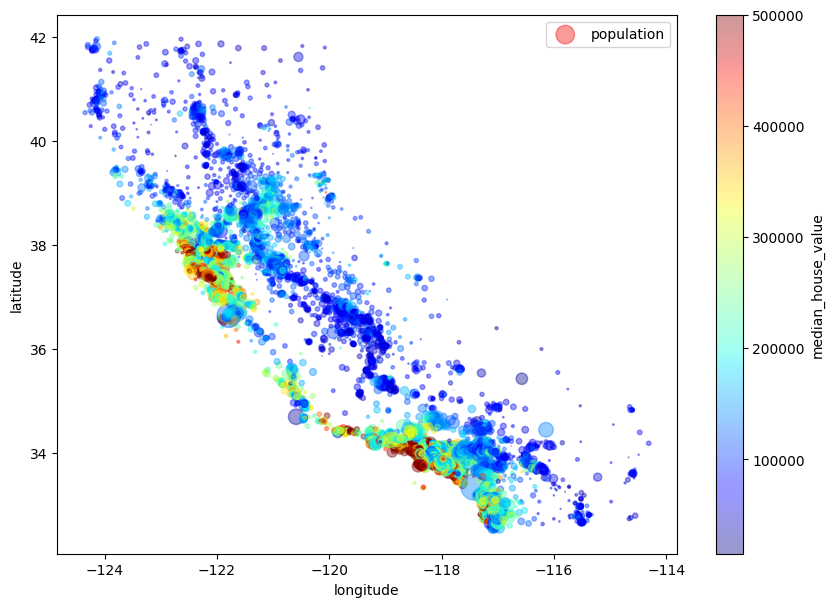

In [149]:
data.plot(x='longitude', y='latitude', kind='scatter', alpha=0.4,
          s=data["population"]/100, label="population", figsize=(10, 7),
          c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)


* s the radius of the circle, represent the district population
*  c : color of the circle, represent the price
we see that price are correlated to the location and density, close to the ocean 
might use a clustering algo

## Correlation

In [150]:
corr_matrix = data.drop('ocean_proximity',axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

how much each attribute correlates with the median house value

Lets take the 4 first one as they are quite correlated with median_house_value ( our y)

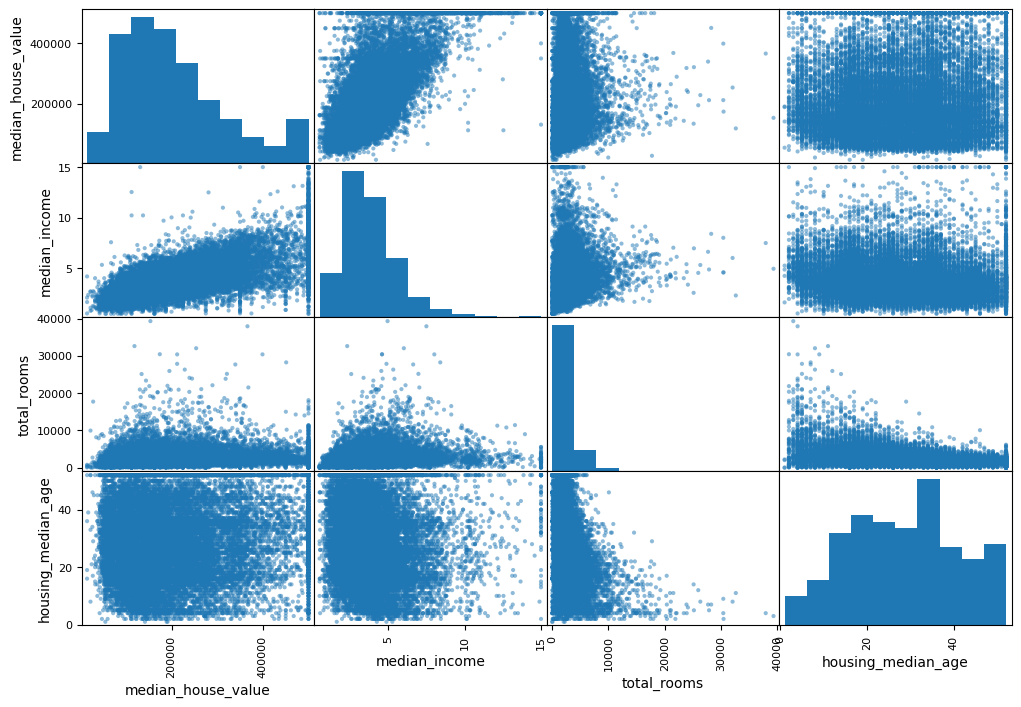

In [151]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8));

median house value & the median income are higly correlated 

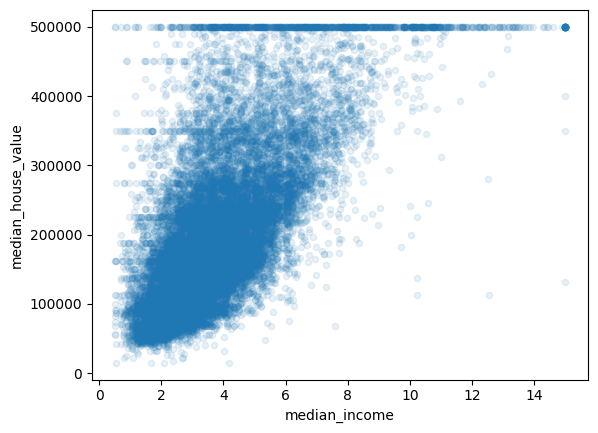

In [152]:
data.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1);


*  First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed
*  a horizontal cap line at $500,000,  a horizontal line around $450,000, another around $350,000, perhaps one around $280,000,

## Experimenting with Attribute Combinations


some attributes have a tail-heavy distribution, so you may want to trans‐
form them 

In [153]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

In [154]:
corr_matrix = data.drop('ocean_proximity',axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

* new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
* houses with a lower bedroom/room ratio tend to be more expensive.
* The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are

## Prepare the Data for Machine Learning Algorithms

go back to initial train_set

In [155]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income ocean_proximity income_cat  
12655      2237.0       706.0         2.1736          INLAND          2  
15502      2015.0       768.0         6.3373      NEAR OCEAN          5  
2908        667.0       300.0         2.8750          INLAND          2  
14053       898.0       483.0         2.2264      NEAR OCEAN          2  
20496      1837.0       580.0         4.4964       <1H OCEAN          3  
...           ...         ...            ...             ...        ...  
15174      2026.0      1001.0         5.0900       <1H OCEAN          4  
12661      4769.0      1418.0         2.8139          INLAND          2  
19263       458.0       172.0         3.1797       <1H OCEAN          3  
19140      1208.0       501.0         4.1964       <1H OCEAN          3  
19773       625.0       197.0         3.1319          INLAND          3  

[16512 rows x 10 columns]

### Data Cleaning

3 options :

* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.).

In [156]:
housing.dropna(subset=["total_bedrooms"]) # option 1 add inplace
housing.drop("total_bedrooms", axis=1) # option 2 add inplace
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)


C:\Users\ilyes\AppData\Local\Temp\ipykernel_26892\173453841.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


use sklearn **SimpleImputer**

In [157]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable

In [158]:
print(imputer.statistics_)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    3.     ]


use this “trained” imputer to transform the training set by replacing
missing values by the learned medians

In [159]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


#### Handling Text and Categorical Attributes

let’s convert ocean_proximity categories from text to numbers

In [160]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)


ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

we can use Scikit-Learn’s OrdinalEncoder class

In [161]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [162]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

get the list of categories using the categories_ instance variable. It is a list
containing a 1D array of categories for each categorical attribute

In [163]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values.
for example here, Ocean is concider to be closer to INLAND than NEAR OCEAN, which is wrong

one solution : **one-hot** encoding
* one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called , because

Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors 

In [164]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**a SciPy sparse matrix** :  only store the location of non 0 atribute

In [165]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Custom Transformers

Transformers. Some estimators (such as an imputer) can also transform a
dataset; these are called transformers. Once again, the API is quite simple: the
transformation is performed by the transform() method with the dataset to
transform as a parameter. It returns the transformed dataset. This transforma‐
tion generally relies on the learned parameters, as is the case for an imputer.
All transformers also have a convenience method called fit_transform()
that is equivalent to calling fit() and then transform() (but sometimes
fit_transform() is optimized and runs much faster).

all you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform()

 add BaseEstimator as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for auto‐
Prepare the Data for Machine Learning Algorithms | 71
matic hyperparameter tuning

In [166]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing.info())
print(housing_extra_attribs)


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB
None
[[-121.46 38.52 29.0 ... 2 5.485835694050992 3.168555240793201]
 [-117.23 33.09 7.0 ... 5 6.927083333333333 2.6236979166666665]
 [-119.04 35.37 44.0 ... 2 5.3933333333333335 2.223333333333333]
 ...
 [-122.72 38.44 48.0 ...

* one hyperparameter, add_bedrooms_per_room, when true, allow to create new attribute rooms_per_household & rooms_per_household

In [167]:
pd.DataFrame(housing_extra_attribs,columns=list(housing.columns.values) + ['rooms_per_household', 'bedrooms_per_room']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   longitude            16512 non-null  object
 1   latitude             16512 non-null  object
 2   housing_median_age   16512 non-null  object
 3   total_rooms          16512 non-null  object
 4   total_bedrooms       16512 non-null  object
 5   population           16512 non-null  object
 6   households           16512 non-null  object
 7   median_income        16512 non-null  object
 8   ocean_proximity      16512 non-null  object
 9   income_cat           16512 non-null  object
 10  rooms_per_household  16512 non-null  object
 11  bedrooms_per_room    16512 non-null  object
dtypes: object(12)
memory usage: 1.5+ MB


### Feature Scaling

2 ways :
* **normalization** : values are shifted and rescaled so that they end up ranging from 0 to 1, use **MinMaxScaler**
* **standardization** :  subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that use  **StandardScaler** 

As with all the transformations, it is important to fit the scalers to
the **training data only**, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).

### Transformation Pipelines

there are many data transformation steps that need to be executed in
the right order.  Pipeline class to help with
such sequences of transformations

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # replace null
    ('attribs_adder', CombinedAttributesAdder()), # create new attribut
    ('std_scaler', StandardScaler()), # standardization
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


* The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps.
* All but the last estimator must be transformers (i.e., they must have a **fit_transform()** method). 
* The names can be anything you like (as long as they are unique and don’t contain double underscores “__”): they will come in handy later for hyperparameter tuning.

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

**ColumnTransformer**

In [169]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)

cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs), # apply pipeline to numerical column
 ("cat", OneHotEncoder(), cat_attribs), # apply onehot encore to string columns
 ])
housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Mode

In [170]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [171]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


we can mesure error using **RMSE**

In [172]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

a typical prediction error of $68,628 is not very satisfying, an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix
underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how
it does

**DecisionTreeRegressor** :

In [173]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [174]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

the model has badly overfit the data, we can prove this by using our test data

### Better Evaluation Using Cross-Validation

The following code randomly splits the training set into 10 distinct subsets called folds,then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [177]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [72061.23824097 70906.12418128 67478.1155491  70660.78591113
 71534.34368039 76728.51466293 69117.86256754 71867.28390398
 70092.71371353 70055.44157767]
Mean: 71050.2423988522
Standard deviation: 2296.5173129396344


In [178]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534865


the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model

**RandomForestRegressor**

In [184]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [183]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())


KeyboardInterrupt: 

### Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them. Let’s look at a few ways you can do that

#### Grid Search

One option would be to fiddle with the hyperparameters manually, until you find a
great combination of hyperparameter values. This would be very tedious work, and
you may not have time to explore many combinations

 GridSearchCV to search for you. All you need
to do is tell it which hyperparameters you want it to experiment with and what
values to try out, and it will use cross-validation to evaluate all the possible
combinations of hyperparameter values. For example, the following code searches
for the best combination of hyperparameter values for the RandomForestRegressor

In [185]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of
n_estimators and max_features hyperparameter values specified in the first dict
, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).
The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor
hyperparameter values, and it will train each model 5 times (since we are using
five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90
rounds of training! It may take quite a long time, but when it is done you can get
the best combination of parameters like this:

In [186]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [187]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [188]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63767.52724477036 {'max_features': 2, 'n_estimators': 3}
55521.719395448265 {'max_features': 2, 'n_estimators': 10}
53468.34937114927 {'max_features': 2, 'n_estimators': 30}
61536.05633919298 {'max_features': 4, 'n_estimators': 3}
53703.58214553317 {'max_features': 4, 'n_estimators': 10}
51445.74746740714 {'max_features': 4, 'n_estimators': 30}
59711.81069935749 {'max_features': 6, 'n_estimators': 3}
53391.730148766124 {'max_features': 6, 'n_estimators': 10}
51031.92892969036 {'max_features': 6, 'n_estimators': 30}
59245.95962676159 {'max_features': 8, 'n_estimators': 3}
52899.66025774377 {'max_features': 8, 'n_estimators': 10}
50718.01636313166 {'max_features': 8, 'n_estimators': 30}
63029.128882990175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54839.622427329006 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60688.02929938351 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53348.985625541245 {'bootstrap': False, 'max_features': 3, 'n_estimators

we obtain the best solution by setting the max_features hyperparameter to 8 and the n_estimators hyperparameter to 30. The RMSE score is slightly better than the score you got earlier using the default hyperparameter values.
Congratulations, you have successfully fine-tuned your best model

#### Randomized Search

#### Ensemble Methods

you will often gain good insights on the problem by inspecting the best models, the RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions

In [189]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.11389568e-02, 5.81713069e-02, 4.43034692e-02, 1.61922168e-02,
       1.66222900e-02, 1.60070223e-02, 1.49066135e-02, 2.59197417e-01,
       1.70611292e-01, 4.39969636e-02, 1.12176876e-01, 3.53789681e-02,
       5.49418932e-03, 1.40688077e-01, 1.63117246e-04, 1.82418886e-03,
       3.12703535e-03])

In [190]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.25919741716675054, 'median_income'),
 (0.1706112915452172, 'income_cat'),
 (0.14068807712107562, 'INLAND'),
 (0.112176876174254, 'pop_per_hhold'),
 (0.06113895678136343, 'longitude'),
 (0.05817130690058414, 'latitude'),
 (0.04430346918858389, 'housing_median_age'),
 (0.04399696364378665, 'rooms_per_hhold'),
 (0.03537896808489375, 'bedrooms_per_room'),
 (0.016622290002995872, 'total_bedrooms'),
 (0.016192216828061275, 'total_rooms'),
 (0.016007022289133595, 'population'),
 (0.014906613497492303, 'households'),
 (0.005494189319798938, '<1H OCEAN'),
 (0.0031270353451275496, 'NEAR OCEAN'),
 (0.0018241888645739485, 'NEAR BAY'),
 (0.00016311724630723885, 'ISLAND')]

you may want to try dropping some of the less useful
features (e.g., apparently only one ocean_proximity category is really useful, so you
could try dropping the others)

### Evaluate Your System on the Test Set

 Now is the time to evaluate the final model on the test set

In [192]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
np.sqrt(final_mse)

48716.73276140792

confidence interval :

In [193]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46649.3589229 , 50699.87587732])

### Launch, Monitor, and Maintain Your System

One way to do this is
to save the trained Scikit-Learn model (e.g., using joblib)

In [ ]:
import joblib
joblib.dump(final_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")